# Numerical Methods of Integration
© Kelly McQuighan 2017

## Introduction

The purpose of this notebook is to compare the five different methods of numerical integration discussed in class:
- left Riemann sums
- right Riemann sums
- midpoint rule
- trapezoid rule
- Simpson's rule

You will first use each numerical method to integrate any function of your choice to get an intuitive feel about which methods are better.

You will then learn the concept of the **order** of a numerical method, and investigate the order of each of the five methods. This gives you a way to quantify "which method is best."

Lastly, you will learn about log-log plots and how they can be used to rigorously compute the order of a numerical method.

## Set-up

The notebook relies on Python code. To initialize the notebook, select **Cell->Run All Below**


<img src="start.png">

In [1]:
from ipywidgets import interact, fixed
%matplotlib inline
import areaTools as AT
import ipywidgets as widgets

## Generating approximations of areas

First try approximating the area of several functions using each method to get a sense of which numerical methods you think are better or worse than the others. 

**Do:** Change the variables in the boxes below based on the problem that you're interested in. The notebook will automatically change the picture and computations to reflect your changes.


**Consider:** Based on the picture alone, and before looking at the approximated areas, for your specific choice of function do you think the method over-estimates, under-estimates, or is indeterminante? Which numerical method to do you think is best? Worst?

Some quick explanations of how the notebook works:

**The meaning of the variables are as follows:**
- "a": the left endpoint of the integration interval
- "b": the right endpoint of the integration interval
- "n" the number of sub-intervals to use for approximating the integral
- "f": the function to integrate.

**How to define the function:**
- x\*\*p means $x^p$. For example, x\*\*0.5 means $\sqrt x$
- for a constant function $f(x) = c$ use $c*(x**0)$ (every function definition needs an x in it!)
- for $e^p$ use exp(p) (so for $e$ use exp(1))
- for $\pi$ use pi
- type trig functions the way you would on your calculator(sin(x), cos(x), etc)

**Some functions you might want to try:**
- 4-x\*\*2
- cos(x)
- sin(x\*\*2)
- exp(x\*\*2)
- exp(-x\*\*2/2)/sqrt(2.\*pi) (this is the famous "normal curve")
- exp(x)/x (make sure that 0 is not part of your interval!)

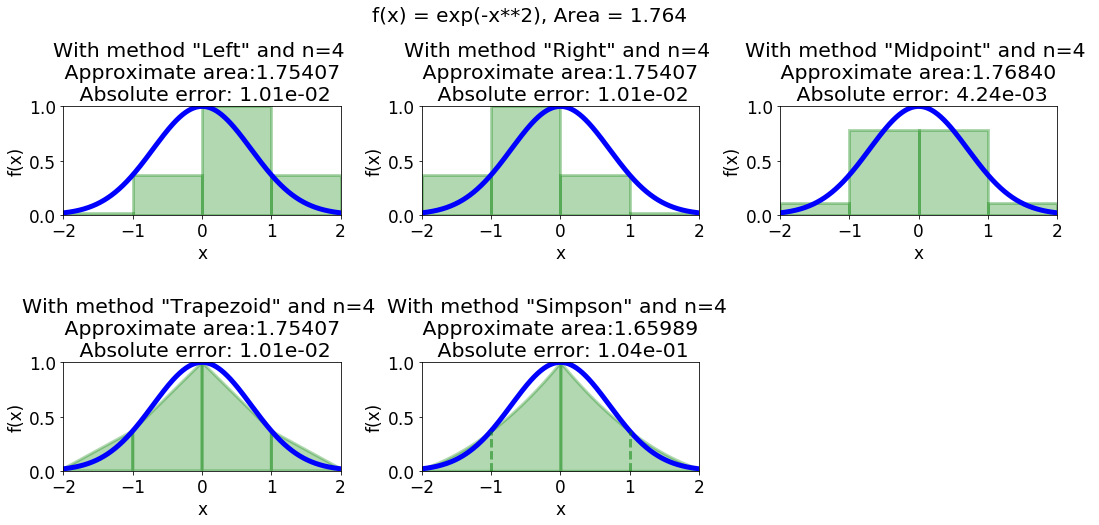

In [5]:
## Do not change the text in this box
n_slider = widgets.IntSlider(min=2,max=40, step=2, value=4)
interact(AT.plotArea,f="exp(-x**2)",a="-2.0",b="2.0",n=n_slider);

## Comparing the different methods

Now that you have an intuitive sense of which methods are "better," let's see if we can quantify it. To understand how to do so, consider the following data:

n| error: method 1 | error: method 2 | error: method 3
:-:|:---------------: |:---------------: | :---------------:
2| 4.0 | 8.0 | 8.0
4| 2.0 | 2.0 | 1.0
8| 1.0 | 0.5 | 0.125

Which method do you think is better? If you were only using 2 subintervals then the obvious answer is method 1. But as soon as we increase $n$ this changes. It somehow feels like method 3 is the best since the error **more quickly approaches zero as the number of sub-intervals increases**, but how do we quantify this? The trick is to take the **ratio** between successive rows of hte table. For the methods in the table we observe that: As the number of subintervals **doubles** the error for method 1 decreases by a **factor of 2**, the error for method 2 decreases by a **factor of 4**, and the error for method 3 decreases by a **factor of 8**. The more mathematically precise way of saying this is to relate the error to a power of $1/n$ (or, equivalently, $\Delta x$). For the methods listed above we have: 

$$
\text{error}_{\text{method 1}} = \frac{C_1}n = \tilde C_1\left(\Delta x\right)\qquad
\text{error}_{\text{method 2}} = \frac{C_2}{n^2} = \tilde C_2\left(\Delta x\right)^2\qquad
\text{error}_{\text{method 3}} = \frac{C_3}{n^3} = \tilde C_3\left(\Delta x\right)^3
$$

In this case, we call method 1 an **1st order** method, method 2 an **2nd order** method, and method 3 a **3rd order** method. In general, if the error for a method is proportional to $1/n^p$ (equivalently $(\Delta x)^p$), we call the method as **pth order** method. Thus a higher-order method is "better" in the sense that the error approaches zero more rapidly as you increase the number of intervals.  

Let's investigate the order of all five numerical methods discussed in class.

**Do:** 

(1) Change the variables in the boxes below based on the problem that you're interested in. 

- "n" now is the starting number of subintervals; the program will automatically approximate the area with n, 2n, and 4n subintervals.

(2) Repeat with a different function, or a different interval of integration. 

**Consider**: Can you determine the order of each method?

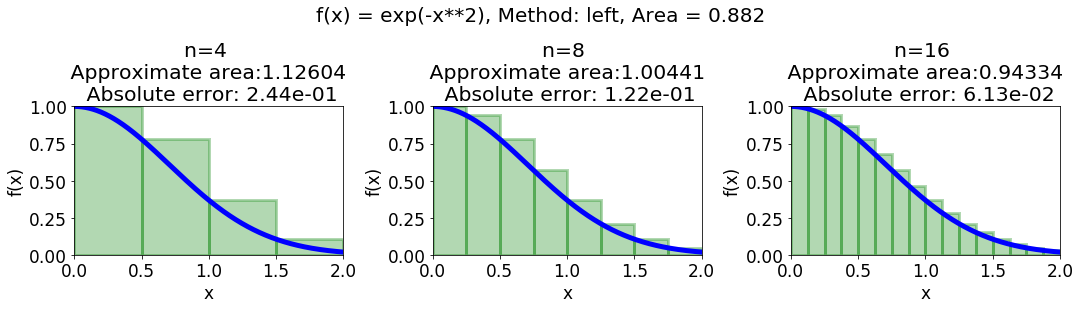

When using method left to compute the area under f(x) = exp(-x**2):
- In doubling the number of subintervals from n=4 to n=8 the error was decreased by a factor of 1.99
- In doubling the number of subintervals from n=8 to n=16 the error was decreased by a factor of 2.00


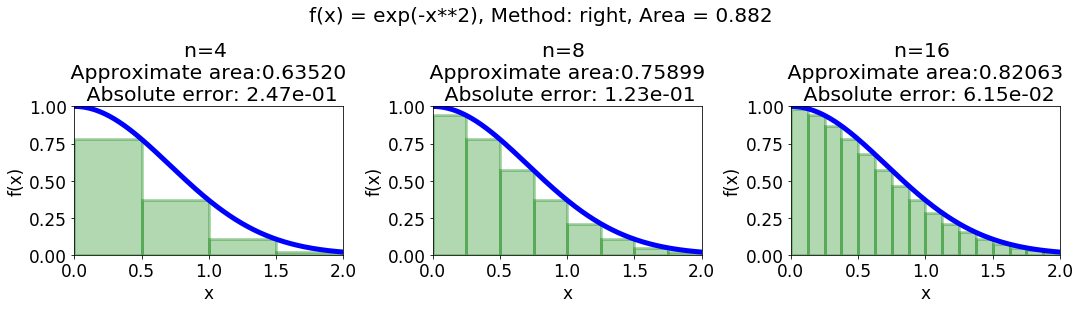

When using method right to compute the area under f(x) = exp(-x**2):
- In doubling the number of subintervals from n=4 to n=8 the error was decreased by a factor of 2.01
- In doubling the number of subintervals from n=8 to n=16 the error was decreased by a factor of 2.00


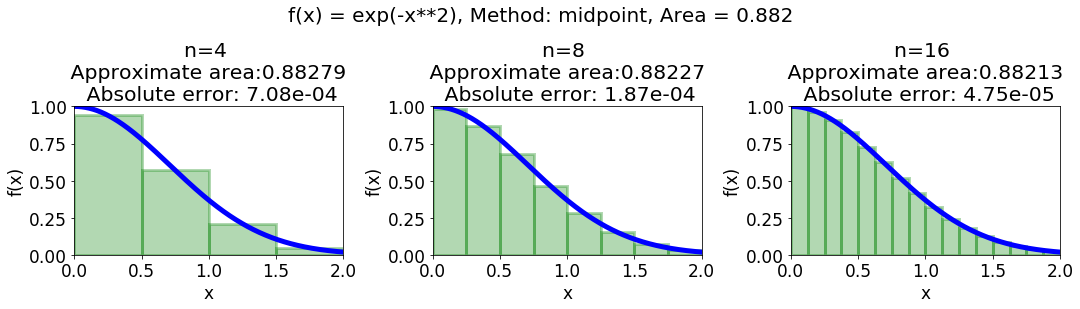

When using method midpoint to compute the area under f(x) = exp(-x**2):
- In doubling the number of subintervals from n=4 to n=8 the error was decreased by a factor of 3.78
- In doubling the number of subintervals from n=8 to n=16 the error was decreased by a factor of 3.95


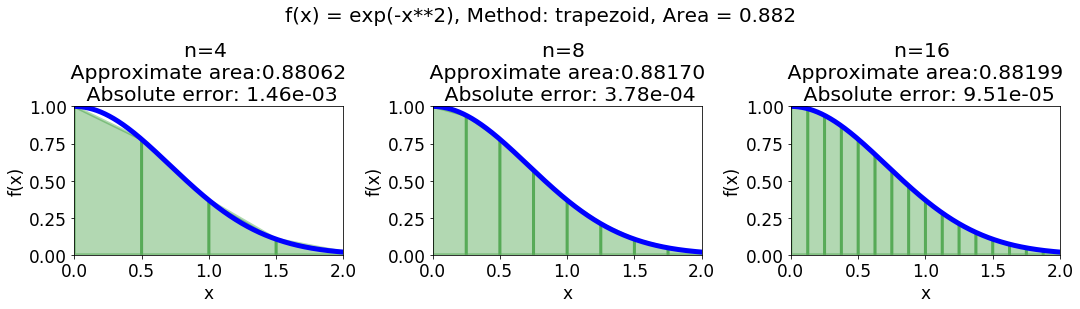

When using method trapezoid to compute the area under f(x) = exp(-x**2):
- In doubling the number of subintervals from n=4 to n=8 the error was decreased by a factor of 3.87
- In doubling the number of subintervals from n=8 to n=16 the error was decreased by a factor of 3.97


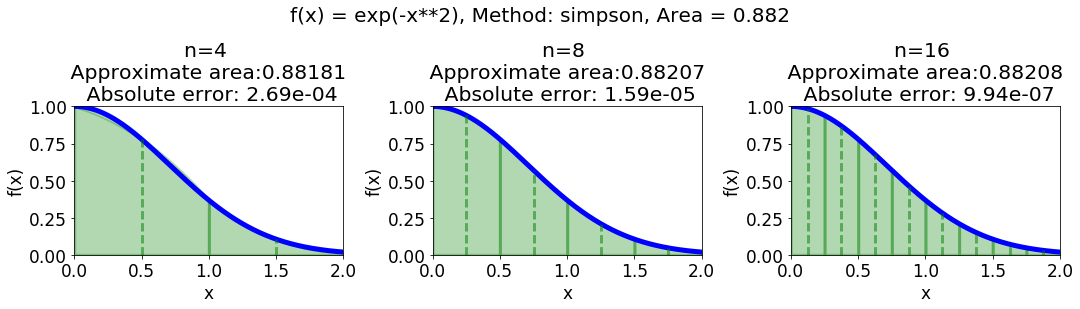

When using method simpson to compute the area under f(x) = exp(-x**2):
- In doubling the number of subintervals from n=4 to n=8 the error was decreased by a factor of 16.94
- In doubling the number of subintervals from n=8 to n=16 the error was decreased by a factor of 15.97


In [3]:
## Do not change the text in this box
n_slider = widgets.IntSlider(min=2,max=40, step=2, value=4)
interact(AT.plotAllMethods,f="exp(-x**2)",a="0.0",b="2.0",n=n_slider);

## log-log plots: A more systematic comparison of the errors

Our goal is to find systematic way to compute the order of a method. To understand how to do this, let's consider the same table, but now taking the logarithm, base 2, of all the data. Recall that the logarithm is defined as follows:

$2^y = x$ means that $\log_2(x) = y$ (and vice versa)

Therefore, the original data table

n| error: method 1 | error: method 2 | error: method 3
:-:|:---------------: |:---------------: | :---------------:
2| 4.0 | 8.0 | 8.0
4| 2.0 | 2.0 | 1.0
8| 1.0 | 0.5 | 0.125

becomes:

$\log_2(n)$| $\log_2$(error): method 1 | $\log_2$(error): method 2 | $\log_2$(error): method 3
:-----------:|:-------------------------: |:------------------------: |:------------------------: 
1 | 2.0 | 3.0 | 3.0
2 | 1.0 | 1.0 | 0.0
3 | 0.0 | -1.0 | -3.0

Observe that the slope of the log-log plot for method 1 (the 1st order method) is -1, the slope for the log-log plot for method 2 (the second order method) is -2, and the slope for method 3 (the third order method) is -3! In general, we have the following rule:

**"If a method is pth order, then the slope of the log-log plot of $n$ versus the error will have slope of $-p$."**

This follows from the definitions of *logarithm* and *order*.

Let's investigate the order of all five numerical methods using log-log plots.

**Do:** 

(1) Change the variables in the boxes below based on the problem that you're interested in. 

- The program automatically computes the error for $n=[8,16,32,64,128]$ subintervals. The graph is a log-log plot of the error for each method and each value of n.

**Consider**: 

(1) Which method has the steepest slope? Which has the least steep slope? 

(2) What is the order of each method? Does this match your prediction from the comparison plots above?

Technical Note: for ease of comparison between the methods, all errors have been normalized so that the upper right endpoint of the log-log curves are always located at (1,1).

Using method Left Riemann the slope of the log-log plot is -1.00
Using method Right Riemann the slope of the log-log plot is -1.00
Using method Midpoint the slope of the log-log plot is -2.00
Using method Trapezoid the slope of the log-log plot is -2.00
Using method Simpson the slope of the log-log plot is -4.00


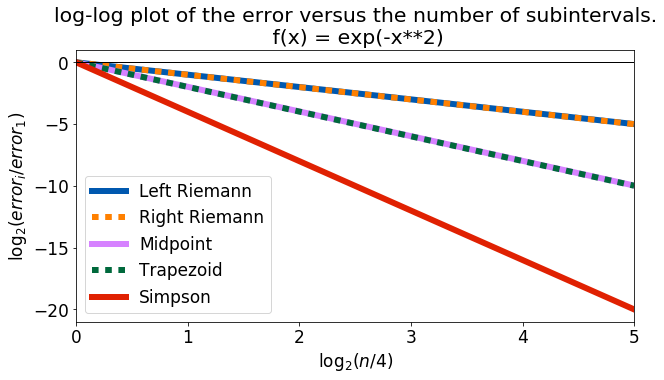

In [4]:
## Do not change the text in this box
interact(AT.compareMethods, f="exp(-x**2)",a="0.0",b="2.0");